In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('crop_recommendation.csv')

# Show Top 5 Records


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Shape of the Dataset

In [5]:
df.shape

(2200, 8)

# Dataset Information

### Soil Parameters
1.   Nitrogen (N) Value
2.   Phosphorus (P) Value
3.   Potassium (K) Value
4.   Temperature (℃)
5.  Humidity (%)
6.  pH Value
7.  Rainfall (mm)

### Crop Labels :

Rice, Maize, Chickpea, Kidneybeans, Pigeonpeas, Mothbeans, Mungbeans, Blackgram, lentil, Pomegranate, Banana, Mango, Grapes, Watermelon, Muskmelon, Apple, Orange, Papaya, Coconut, Cotton, Jute, Coffee


### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

# Check for missing Values

In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

NO MISSING VALUES

# Checking for Duplicated Values

In [7]:
df.duplicated().sum()

0

NO DUPLICATES

# Check Data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Insight


*   From above description of numerical data, means are varying from 6.46 of pH and 103.46 of rainfall;
*   All standard deviations are varying from 0.77 of pH and 54.95 of Rainfall;


*   Minimum Rainfall recorded is 64.55mm while the maximum rainfall is 298.56mm


*   Minimum Temperature recorded is 8.8C while the maximum being 43.67C
*   Minimum Humidity recorded is 14.25% while maximum being 99.98%









# Exploring Data

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
print("Categories in 'label' variable:     ",end=" " )
print(df['label'].unique())

Categories in 'label' variable:      ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

We have 1 categorical features : ['label']


In [14]:
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


# Averages of Soil Parameters for each Crop Label.

In [15]:

# Group by 'label' and calculate the mean for each numeric column
averages_by_label = df.groupby('label')[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean().reset_index()

# Display the result
print(averages_by_label)

          label       N       P       K  temperature   humidity        ph  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   

In [16]:
# Parameters to check
parameters = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Loop through each parameter to find crops with min and max average values
for param in parameters:
    min_value = averages_by_label[param].min()
    max_value = averages_by_label[param].max()

    crop_min = averages_by_label[averages_by_label[param] == min_value]['label'].values[0]
    crop_max = averages_by_label[averages_by_label[param] == max_value]['label'].values[0]

    print(f"Minimum average {param} value of {min_value:.2f} is recorded for crop: {crop_min}")
    print(f"Maximum average {param} value of {max_value:.2f} is recorded for crop: {crop_max}")
    print("-" * 80)

Minimum average N value of 18.77 is recorded for crop: lentil
Maximum average N value of 117.77 is recorded for crop: cotton
--------------------------------------------------------------------------------
Minimum average P value of 16.55 is recorded for crop: orange
Maximum average P value of 134.22 is recorded for crop: apple
--------------------------------------------------------------------------------
Minimum average K value of 10.01 is recorded for crop: orange
Maximum average K value of 200.11 is recorded for crop: grapes
--------------------------------------------------------------------------------
Minimum average temperature value of 18.87 is recorded for crop: chickpea
Maximum average temperature value of 33.72 is recorded for crop: papaya
--------------------------------------------------------------------------------
Minimum average humidity value of 16.86 is recorded for crop: chickpea
Maximum average humidity value of 94.84 is recorded for crop: coconut
---------------

# Data Visualization Using Histogram

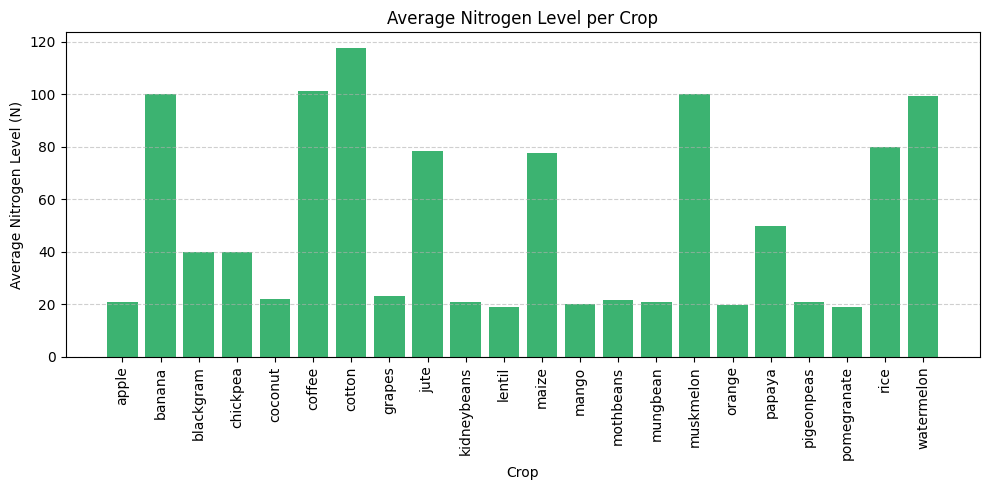

🔍 Insight:
- The crop with the **lowest average Nitrogen** requirement is **lentil** with 18.77 units.
- The crop with the **highest average Nitrogen** requirement is **cotton** with 117.77 units.
- This indicates a significant variation in nitrogen needs across different crops, highlighting the importance of tailored fertilization.


In [17]:
# Plot for Nitrogen (N)
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['N'], color='mediumseagreen')
plt.xlabel('Crop')
plt.ylabel('Average Nitrogen Level (N)')
plt.title('Average Nitrogen Level per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Nitrogen
min_crop = averages_by_label.loc[averages_by_label['N'].idxmin(), 'label']
min_value = averages_by_label['N'].min()

max_crop = averages_by_label.loc[averages_by_label['N'].idxmax(), 'label']
max_value = averages_by_label['N'].max()

print(f"🔍 Insight:")
print(f"- The crop with the **lowest average Nitrogen** requirement is **{min_crop}** with {min_value:.2f} units.")
print(f"- The crop with the **highest average Nitrogen** requirement is **{max_crop}** with {max_value:.2f} units.")
print(f"- This indicates a significant variation in nitrogen needs across different crops, highlighting the importance of tailored fertilization.")

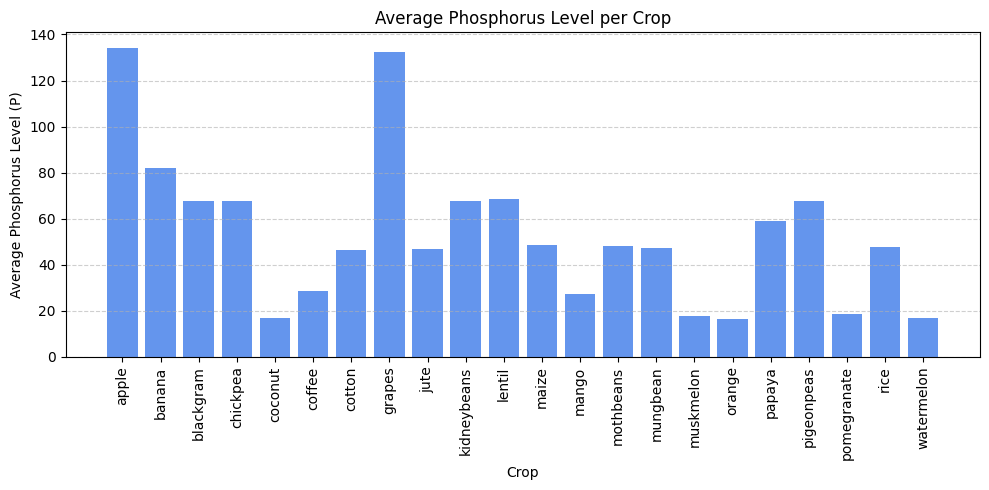

🔍 Insight:
- The crop with the **lowest average Phosphorus** requirement is **orange** with 16.55 units.
- The crop with the **highest average Phosphorus** requirement is **apple** with 134.22 units.
- Managing phosphorus input based on crop-specific needs can improve both productivity and soil health.


In [18]:
# Plot for Phosphorus (P)
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['P'], color='cornflowerblue')
plt.xlabel('Crop')
plt.ylabel('Average Phosphorus Level (P)')
plt.title('Average Phosphorus Level per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Phosphorus
min_crop = averages_by_label.loc[averages_by_label['P'].idxmin(), 'label']
min_value = averages_by_label['P'].min()

max_crop = averages_by_label.loc[averages_by_label['P'].idxmax(), 'label']
max_value = averages_by_label['P'].max()

print(f"🔍 Insight:")
print(f"- The crop with the **lowest average Phosphorus** requirement is **{min_crop}** with {min_value:.2f} units.")
print(f"- The crop with the **highest average Phosphorus** requirement is **{max_crop}** with {max_value:.2f} units.")
print(f"- Managing phosphorus input based on crop-specific needs can improve both productivity and soil health.")


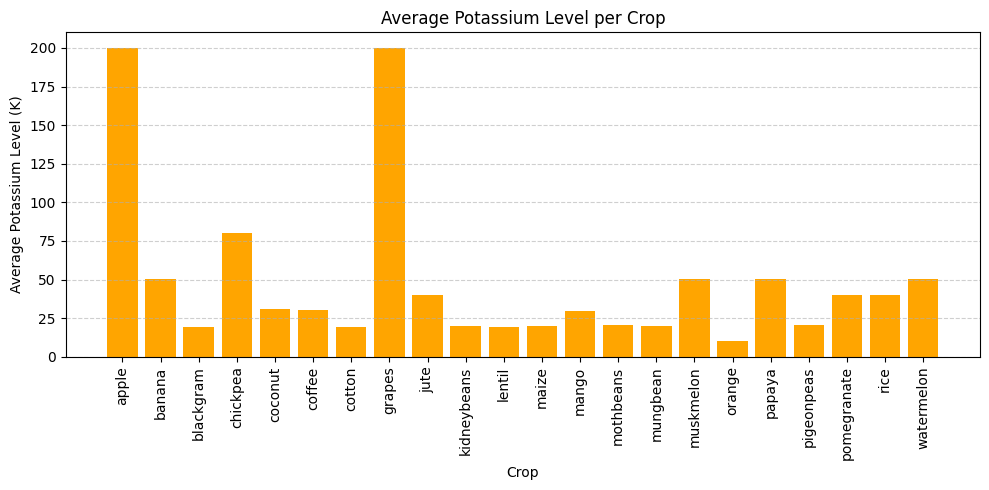

🔍 Insight:
- The crop with the **lowest average Potassium** requirement is **orange** with 10.01 units.
- The crop with the **highest average Potassium** requirement is **grapes** with 200.11 units.
- Potassium levels vary significantly, influencing disease resistance and crop quality — adjusting accordingly is key to optimal yields.


In [19]:
# Plot for Potassium (K)
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['K'], color='orange')
plt.xlabel('Crop')
plt.ylabel('Average Potassium Level (K)')
plt.title('Average Potassium Level per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Potassium
min_crop = averages_by_label.loc[averages_by_label['K'].idxmin(), 'label']
min_value = averages_by_label['K'].min()

max_crop = averages_by_label.loc[averages_by_label['K'].idxmax(), 'label']
max_value = averages_by_label['K'].max()

print(f"🔍 Insight:")
print(f"- The crop with the **lowest average Potassium** requirement is **{min_crop}** with {min_value:.2f} units.")
print(f"- The crop with the **highest average Potassium** requirement is **{max_crop}** with {max_value:.2f} units.")
print(f"- Potassium levels vary significantly, influencing disease resistance and crop quality — adjusting accordingly is key to optimal yields.")


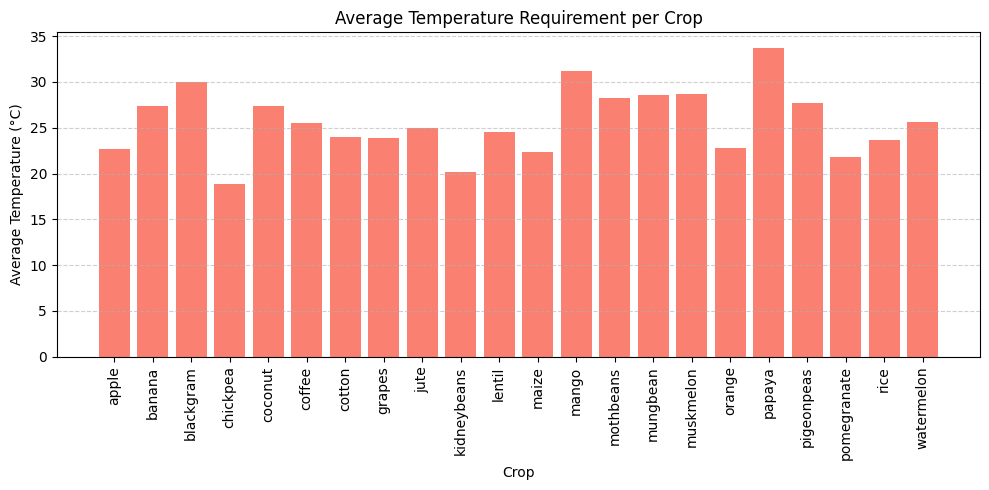

🔍 Insight:
- The crop requiring the **lowest average temperature** is **chickpea** at 18.87°C.
- The crop requiring the **highest average temperature** is **papaya** at 33.72°C.
- Understanding temperature preferences helps ensure climate suitability and improves crop performance.


In [20]:
# Plot for Temperature
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['temperature'], color='salmon')
plt.xlabel('Crop')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Requirement per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Temperature
min_crop = averages_by_label.loc[averages_by_label['temperature'].idxmin(), 'label']
min_value = averages_by_label['temperature'].min()

max_crop = averages_by_label.loc[averages_by_label['temperature'].idxmax(), 'label']
max_value = averages_by_label['temperature'].max()

print(f"🔍 Insight:")
print(f"- The crop requiring the **lowest average temperature** is **{min_crop}** at {min_value:.2f}°C.")
print(f"- The crop requiring the **highest average temperature** is **{max_crop}** at {max_value:.2f}°C.")
print(f"- Understanding temperature preferences helps ensure climate suitability and improves crop performance.")


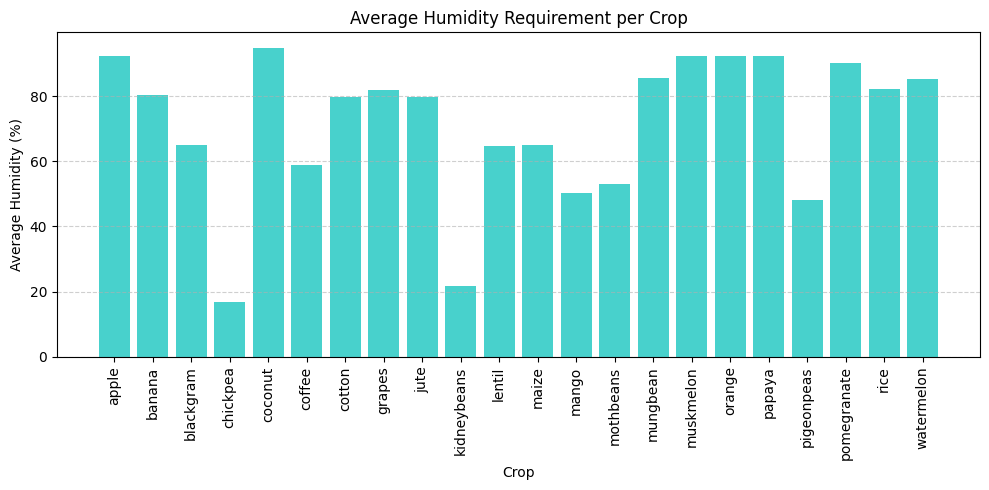

🔍 Insight:
- The crop with the **lowest average humidity** requirement is **chickpea** at 16.86%.
- The crop with the **highest average humidity** requirement is **coconut** at 94.84%.
- Aligning crops with their ideal humidity range supports healthy growth and reduces disease risk.


In [21]:
# Plot for Humidity
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['humidity'], color='mediumturquoise')
plt.xlabel('Crop')
plt.ylabel('Average Humidity (%)')
plt.title('Average Humidity Requirement per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Humidity
min_crop = averages_by_label.loc[averages_by_label['humidity'].idxmin(), 'label']
min_value = averages_by_label['humidity'].min()

max_crop = averages_by_label.loc[averages_by_label['humidity'].idxmax(), 'label']
max_value = averages_by_label['humidity'].max()

print(f"🔍 Insight:")
print(f"- The crop with the **lowest average humidity** requirement is **{min_crop}** at {min_value:.2f}%.")
print(f"- The crop with the **highest average humidity** requirement is **{max_crop}** at {max_value:.2f}%.")
print(f"- Aligning crops with their ideal humidity range supports healthy growth and reduces disease risk.")


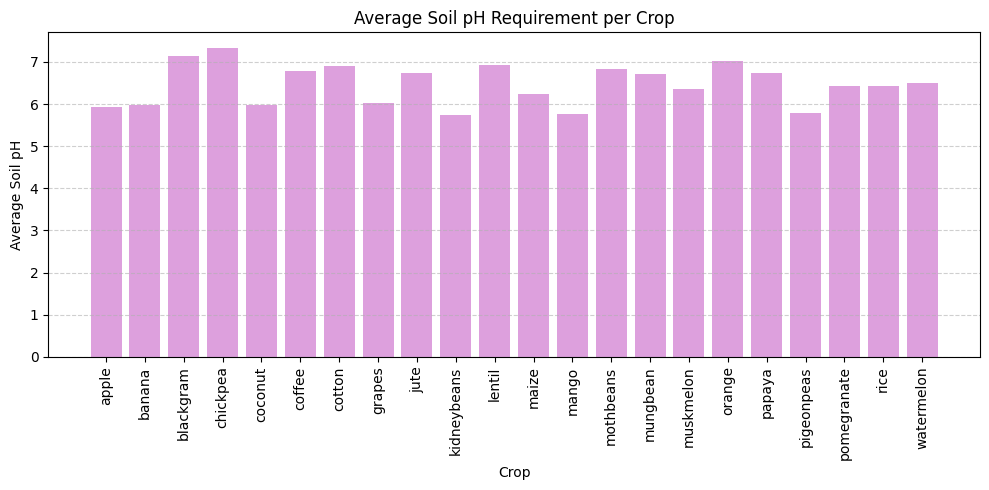

🔍 Insight:
- The crop preferring the **most acidic soil** (lowest average pH) is **kidneybeans** with a pH of 5.75.
- The crop preferring the **most alkaline soil** (highest average pH) is **chickpea** with a pH of 7.34.
- Managing soil pH based on crop needs is critical for nutrient uptake and yield optimization.


In [22]:
# Plot for pH
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['ph'], color='plum')
plt.xlabel('Crop')
plt.ylabel('Average Soil pH')
plt.title('Average Soil pH Requirement per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for pH
min_crop = averages_by_label.loc[averages_by_label['ph'].idxmin(), 'label']
min_value = averages_by_label['ph'].min()

max_crop = averages_by_label.loc[averages_by_label['ph'].idxmax(), 'label']
max_value = averages_by_label['ph'].max()

print(f"🔍 Insight:")
print(f"- The crop preferring the **most acidic soil** (lowest average pH) is **{min_crop}** with a pH of {min_value:.2f}.")
print(f"- The crop preferring the **most alkaline soil** (highest average pH) is **{max_crop}** with a pH of {max_value:.2f}.")
print(f"- Managing soil pH based on crop needs is critical for nutrient uptake and yield optimization.")


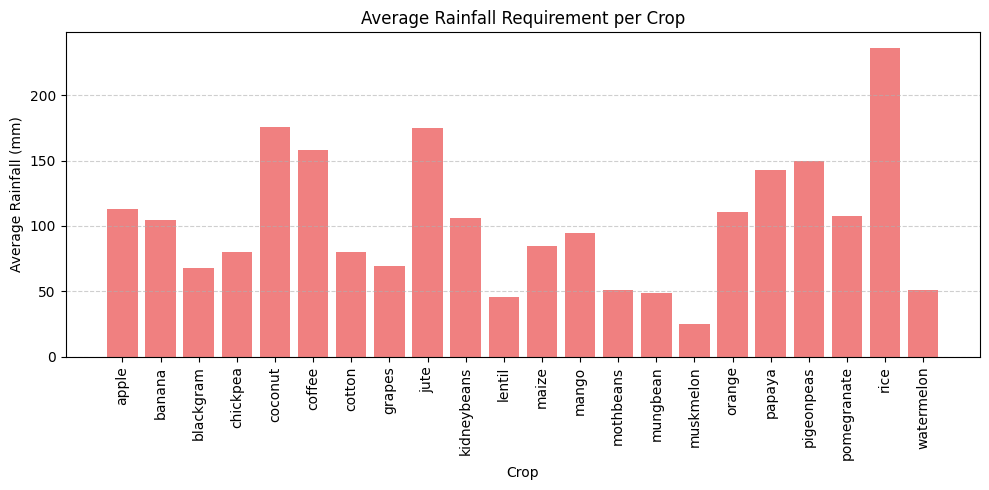

🔍 Insight:
- The crop with the **lowest average rainfall** requirement is **muskmelon** with 24.69 mm.
- The crop with the **highest average rainfall** requirement is **rice** with 236.18 mm.
- Understanding rainfall needs ensures water conservation and optimal irrigation strategies for each crop.


In [23]:
# Plot for Rainfall
plt.figure(figsize=(10, 5))
plt.bar(averages_by_label['label'], averages_by_label['rainfall'], color='lightcoral')
plt.xlabel('Crop')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall Requirement per Crop')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insight for Rainfall
min_crop = averages_by_label.loc[averages_by_label['rainfall'].idxmin(), 'label']
min_value = averages_by_label['rainfall'].min()

max_crop = averages_by_label.loc[averages_by_label['rainfall'].idxmax(), 'label']
max_value = averages_by_label['rainfall'].max()

print(f"🔍 Insight:")
print(f"- The crop with the **lowest average rainfall** requirement is **{min_crop}** with {min_value:.2f} mm.")
print(f"- The crop with the **highest average rainfall** requirement is **{max_crop}** with {max_value:.2f} mm.")
print(f"- Understanding rainfall needs ensures water conservation and optimal irrigation strategies for each crop.")
